In [1]:
%run PyTorTractor.py

# Generating Diagrams

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 12 diagrams
 
**********************************************
 
 
********
3 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

Diagram 4 has been added to diagram 0
Diagram 5 has been added to diagram 1
Diagram 6 has been added to diagram 2
Diagram 8 has been added to diagram 2
Diagram 10 has been added to diagram 2
Diagram 7 has been added to diagram 3
Diagram 9 has been added to diagram 3
Diagram 11 has been added to diagram 3
 8 diagrams have been reduced
To visualize the diagrams use the attribute bul

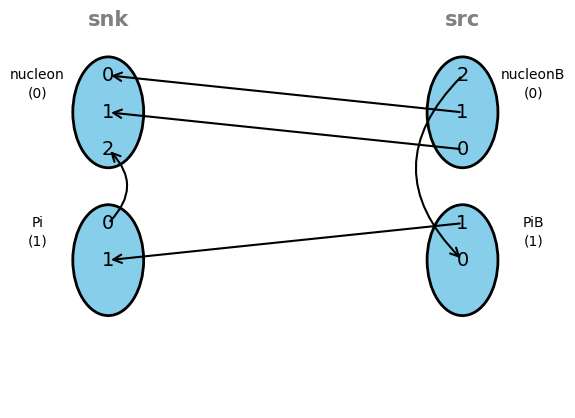

numerical factor =  2
Topology: 
[[[1, 0, 0], [0, 0, 1]], [[1, 0, 1], [0, 0, 0]], [[1, 1, 1], [0, 1, 1]], [[1, 0, 2], [0, 0, 2]], [[0, 1, 0], [1, 1, 0]]]


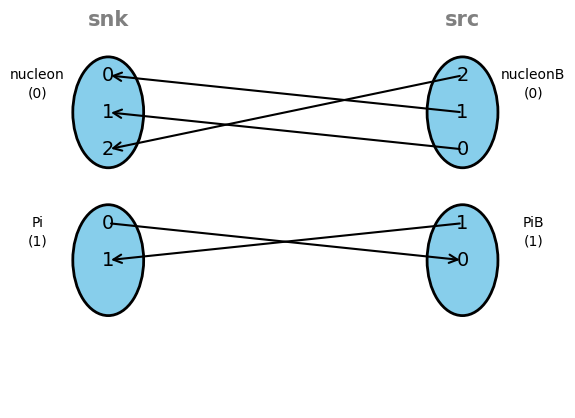

numerical factor =  4
Topology: 
[[[1, 0, 0], [0, 0, 1]], [[1, 0, 1], [0, 1, 1]], [[1, 1, 1], [0, 0, 0]], [[1, 0, 2], [1, 1, 0]], [[0, 1, 0], [0, 0, 2]]]


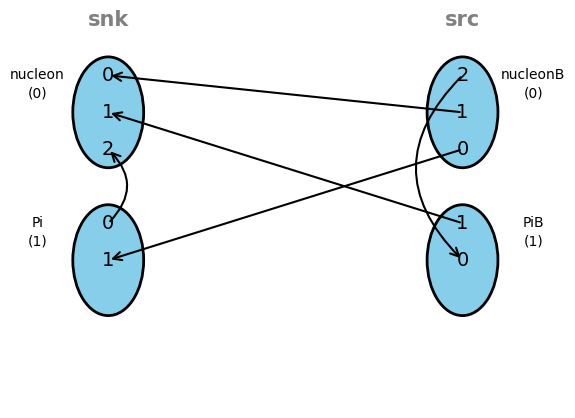

numerical factor =  -4
Topology: 
[[[1, 0, 0], [0, 0, 1]], [[1, 0, 1], [0, 1, 1]], [[1, 1, 1], [0, 0, 0]], [[1, 0, 2], [0, 0, 2]], [[0, 1, 0], [1, 1, 0]]]


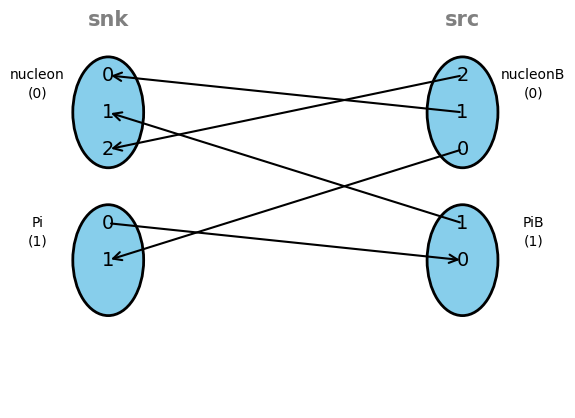

In [28]:
O1 = Nucleon(1/2) * Pion(1)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'PyTor_Test_1.hdf5')
tcmpr = []
for res in Result:
    a = res.bulavision()
    tcmpr.append(np.array(a))

# Defining the participating Hadrons

In [22]:
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = 'mom_ray_000', LGIrrep = 'Hg_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = 'mom_ray_000', LGIrrep = 'Hg_1', Displacement = 'SS_0')

Hadron3 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'isovector_du',
          Momentum = 'mom_ray_000', LGIrrep = 'A1gm_1', Displacement = 'SS_0')
Hadron4 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,1), Flavor = 'isovector_du',
          Momentum = 'mom_ray_000', LGIrrep = 'A1gm_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2, Hadron3, Hadron4]

# Initializing the PyTorch tensors corresponding to Perambulators, ModeDoublets and/or Triplets

In [23]:
device              = get_best_device(use_gpu = True)
perambulators_light = PyTor_Perambulator(Path_Perambulator = ['data/p_snk0_src4.h5', 'data/p_src0_snk3_final.h5', 'data/snk4_src4.h5'], 
                                         Device = device, Double_Reading = True)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1.hdf5', Device = device)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed


# Performing the tensor contractions

In [25]:
test0            = PyCorrTorch(SinkTime = 4, SourceTime = 0, 
                               Hadrons = hadrons, Path_Wicktract = 'PyTor_Test_0.hdf5')
test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)

Diagrams have been successfully clustered! There are 3 clusters
All combinations of hadron structures coefficients were generated
Insert now these combinations explicitly into the the clusters!
Each cluster is now splitted into many clusters with various explicit spin combinations


In [26]:
test0_contracted

([((((0, 1), (0, 0), (1, 0), (1, 1)), (0,)),
   tensor(1.3859e-16+2.3836e-18j, dtype=torch.complex128)),
  ((((0, 1), (0, 0), (1, 0), (1, 1)), (2,)),
   tensor(-8.7199e-17+2.2696e-17j, dtype=torch.complex128)),
  ((((0, 1), (0, 0), (1, 0), (1, 1)), (3,)),
   tensor(1.8432e-22+3.2211e-23j, dtype=torch.complex128)),
  ((((1, 0), (0, 0)), (1,)),
   tensor(5.5357e-15+9.4573e-16j, dtype=torch.complex128)),
  ((((0, 1), (1, 1)), (1,)),
   tensor(-4.9484e-06-4.2352e-22j, dtype=torch.complex128))],
 [np.int64(-2), np.int64(2), np.int64(4), np.int64(-4)])

In [27]:
combine_all(test0_contracted)

(-6.260326429391623e-16+8.600653354979636e-17j)